In [3]:
!pip install seaborn

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv(r'C:\Users\hey\OneDrive\Bureau\grid\grid_voltage_stability_prediction.csv')

In [6]:
df.head(5)

,Timestamp,Voltage Level (kV),Power Consumption (MW),Grid Load (MW),Frequency (Hz),Temperature (°C)
0,1/1/2023 0:00,232.483571,1092.617755,1217.922652,50.038918,18.248217
1,1/1/2023 1:00,229.308679,1190.941664,1160.956042,49.972441,23.554813
2,1/1/2023 2:00,233.238443,860.143243,1057.155644,49.959090,17.075801
3,1/1/2023 3:00,237.615149,1056.296924,972.367587,49.999831,21.920385
4,1/1/2023 4:00,228.829233,934.935743,1133.786798,49.991491,6.063853


In [7]:
df.tail(5)

,Timestamp,Voltage Level (kV),Power Consumption (MW),Grid Load (MW),Frequency (Hz),Temperature (°C)
495,1/21/2023 15:00,232.694550,971.889971,1290.731147,50.053508,33.132052
496,1/21/2023 16:00,224.813769,1179.768653,1297.380429,49.998674,22.210371
497,1/21/2023 17:00,229.048307,1064.084286,1195.003948,49.955906,22.202398
498,1/21/2023 18:00,225.621909,942.882101,1172.887503,49.991847,32.903719
499,1/21/2023 19:00,223.086001,1057.258278,1121.103234,49.962755,28.400513


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               500 non-null    object 
 1   Voltage Level (kV)      500 non-null    float64
 2   Power Consumption (MW)  500 non-null    float64
 3   Grid Load (MW)          500 non-null    float64
 4   Frequency (Hz)          500 non-null    float64
 5   Temperature (°C)        500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


In [9]:
df.describe()

,Voltage Level (kV),Power Consumption (MW),Grid Load (MW),Frequency (Hz),Temperature (°C)
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,230.034190,1003.182612,1063.018144,50.001659,24.884836
std,4.906266,97.799720,121.229561,0.049203,9.595662
min,213.793663,730.311336,702.449355,49.852981,-5.195122
25%,226.498463,940.470826,977.708446,49.969403,18.392636
50%,230.063986,1002.853160,1064.376701,49.999554,24.968477
75%,233.183916,1065.124230,1140.568604,50.034988,31.691764
max,249.263657,1263.238206,1362.201974,50.159655,56.099186


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isna().sum()

Timestamp                 0
Voltage Level (kV)        0
Power Consumption (MW)    0
Grid Load (MW)            0
Frequency (Hz)            0
Temperature (°C)          0
dtype: int64

In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M')

In [15]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


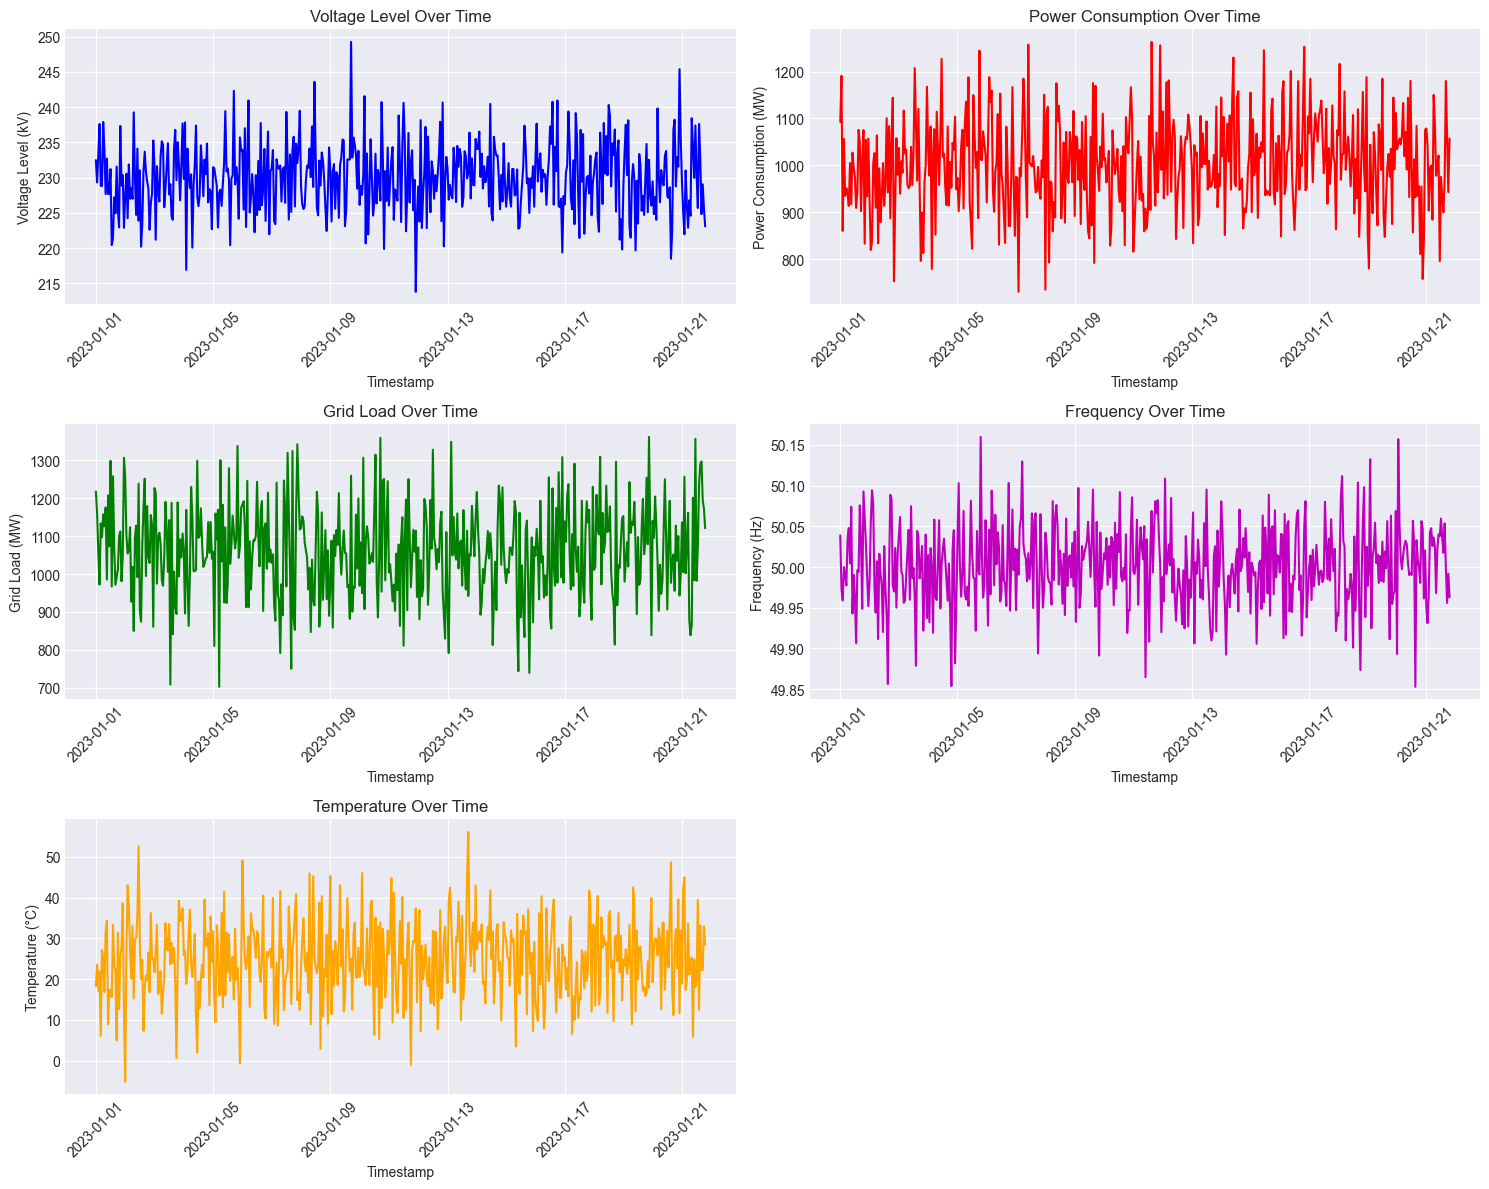

In [17]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

#voltage
axs[0, 0].plot(df['Timestamp'], df['Voltage Level (kV)'], label='Voltage Level (kV)', color='b')
axs[0, 0].set_title('Voltage Level Over Time')
axs[0, 0].set_xlabel('Timestamp')
axs[0, 0].set_ylabel('Voltage Level (kV)')
axs[0, 0].tick_params(axis='x', rotation=45)

#consumption
axs[0, 1].plot(df['Timestamp'], df['Power Consumption (MW)'], label='Power Consumption (MW)', color='r')
axs[0, 1].set_title('Power Consumption Over Time')
axs[0, 1].set_xlabel('Timestamp')
axs[0, 1].set_ylabel('Power Consumption (MW)')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot Grid 
axs[1, 0].plot(df['Timestamp'], df['Grid Load (MW)'], label='Grid Load (MW)', color='g')
axs[1, 0].set_title('Grid Load Over Time')
axs[1, 0].set_xlabel('Timestamp')
axs[1, 0].set_ylabel('Grid Load (MW)')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot Frequency 
axs[1, 1].plot(df['Timestamp'], df['Frequency (Hz)'], label='Frequency (Hz)', color='m')
axs[1, 1].set_title('Frequency Over Time')
axs[1, 1].set_xlabel('Timestamp')
axs[1, 1].set_ylabel('Frequency (Hz)')
axs[1, 1].tick_params(axis='x', rotation=45)

# Plot Temperature 
axs[2, 0].plot(df['Timestamp'], df['Temperature (°C)'], label='Temperature (°C)', color='orange')
axs[2, 0].set_title('Temperature Over Time')
axs[2, 0].set_xlabel('Timestamp')
axs[2, 0].set_ylabel('Temperature (°C)')
axs[2, 0].tick_params(axis='x', rotation=45)

fig.delaxes(axs[2, 1])


plt.tight_layout()
plt.show()

In [18]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Define thresholds
voltage_nominal = 220  
voltage_threshold = 0.05 * voltage_nominal  # ±5% of Vn
frequency_nominal = 50  
frequency_threshold = 0.5  # ±0.5  of F

# (1 = Stable, 0 = Unstable)
df['Stability'] = 1  # Default all as stable


df.loc[(df['Voltage Level (kV)'] < voltage_nominal - voltage_threshold) |
        (df['Voltage Level (kV)'] > voltage_nominal + voltage_threshold) |
        (df['Frequency (Hz)'] < frequency_nominal - frequency_threshold) |
        (df['Frequency (Hz)'] > frequency_nominal + frequency_threshold), 'Stability'] = 0

# Check stability distribution
print(df['Stability'].value_counts())

# Features and Target
X = df[['Voltage Level (kV)', 'Power Consumption (MW)', 'Grid Load (MW)', 'Frequency (Hz)', 'Temperature (°C)']]
y = df['Stability']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Stability
1    289
0    211
Name: count, dtype: int64


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# Init the models
log_model = LogisticRegression()
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC()

# Train
log_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_log = log_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_svm = svm_model.predict(X_test_scaled)

# Model comparison
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Classification report for each model
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_log))

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))

print("\nSVM Report:")
print(classification_report(y_test, y_pred_svm))


Logistic Regression Accuracy: 0.97
Random Forest Accuracy: 0.99
SVM Accuracy: 0.94

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.97      0.98      0.97        59

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100


Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.98      1.00      0.99        59

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100


SVM Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.96      0.93      0.95        59

    accuracy                      

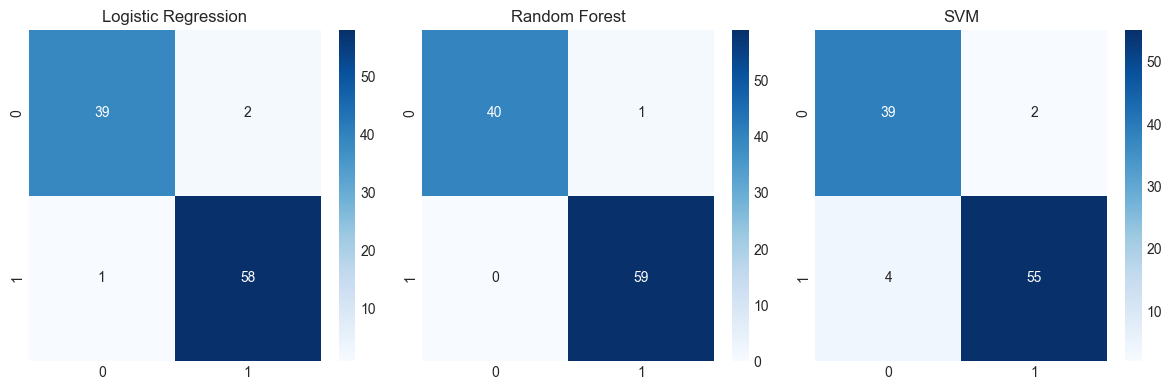

In [20]:
import seaborn as sns

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression")

# Confusion Matrix for Random Forest
plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest")

# Confusion Matrix for SVM
plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues")
plt.title("SVM")

plt.tight_layout()
plt.show()
